In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('../data/raw/bank/bank-full.csv', sep = ';')

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [7]:
df.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
print(df.duplicated().sum())

0


In [11]:
dup = df[df.duplicated()]

In [12]:
dup

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


In [13]:
unknown_counts = (df == "unknown").sum()

In [14]:
unknown_counts

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [15]:
df['balance'].median()

448.0

y
no     39922
yes     5289
Name: count, dtype: int64


<Axes: xlabel='y', ylabel='count'>

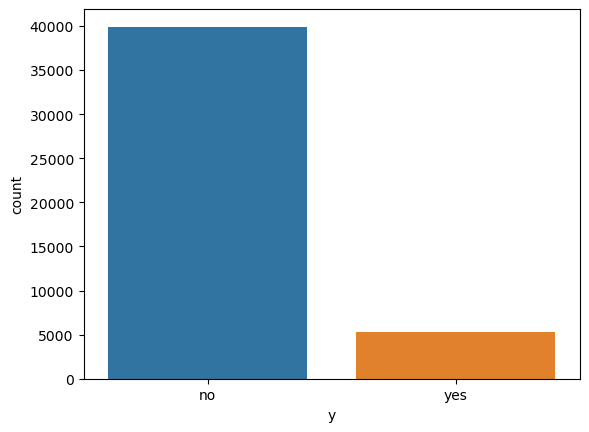

In [16]:
class_counts = df['y'].value_counts()
print(class_counts)

import seaborn as sns
sns.countplot(x = 'y', data = df)

In [17]:
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"Imbalance Ratio: {imbalance_ratio}")

Imbalance Ratio: 7.548118737001324


In [18]:
df['month'].value_counts()

month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: count, dtype: int64

In [19]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Encode categorical variables
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Normalize numerical variables
numerical_cols = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])
df = df.dropna(subset=['contact'])
# Define treatment and outcome
X = df_encoded.drop(columns=['contact', 'y'])  # Features
treatment = df_encoded['contact'].map({'cellular': 1, 'telephone': 0})  # Treatment
outcome = df_encoded['y'].map({'yes': 1, 'no': 0})  # Outcome

treatment = df['contact'].map({'cellular': 1, 'telephone': 0})

In [20]:
print(treatment.isnull().sum())

13020


In [21]:
# # from sklearn.linear_model import LogisticRegression
# # from sklearn.model_selection import train_test_split

# # # Split data
# # X_train, X_test, treatment_train, treatment_test = train_test_split(X, treatment, test_size=0.2, random_state=42)

# # # Train a logistic regression model
# # propensity_model = LogisticRegression()
# # propensity_model.fit(X_train, treatment_train)

# # # Predict propensity scores
# # propensity_scores = propensity_model.predict_proba(X)[:, 1]
# # df['propensity_score'] = propensity_scores

# from sklearn.linear_model import LogisticRegression

# # Train a logistic regression model
# propensity_model = LogisticRegression()
# propensity_model.fit(X, treatment)

# # Predict propensity scores
# propensity_scores = propensity_model.predict_proba(X)[:, 1]
# df['propensity_score'] = propensity_scores

In [22]:
print(treatment.isnull().sum())

13020


In [23]:
import plotly.express as px

# Example data
data = {
    'Category': ['A', 'B', 'C', 'D'],
    'Values': [10, 20, 15, 25]
}

# Create a bar chart
fig = px.bar(data, x='Category', y='Values', title='Sample Bar Chart')

# Display the chart
fig.show()

In [24]:
df['job'].value_counts()

job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

In [25]:
subscription_by_job = df.groupby(['job', 'y']).size()
subscription_by_job

job            y  
admin.         no     4540
               yes     631
blue-collar    no     9024
               yes     708
entrepreneur   no     1364
               yes     123
housemaid      no     1131
               yes     109
management     no     8157
               yes    1301
retired        no     1748
               yes     516
self-employed  no     1392
               yes     187
services       no     3785
               yes     369
student        no      669
               yes     269
technician     no     6757
               yes     840
unemployed     no     1101
               yes     202
unknown        no      254
               yes      34
dtype: int64

<Axes: xlabel='marital', ylabel='count'>

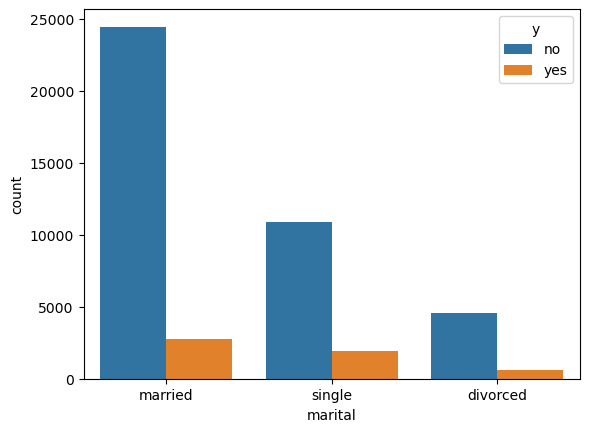

In [26]:
sns.countplot(x  ='marital', hue = 'y', data = df)

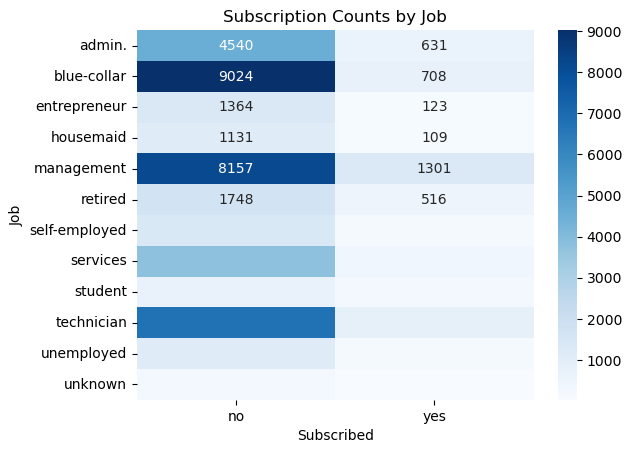

In [27]:
# Create a cross-tabulation of job vs subscription status
cross_tab = pd.crosstab(df['job'], df['y'])

# Plot heatmap
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='Blues')
plt.title('Subscription Counts by Job')
plt.xlabel('Subscribed')
plt.ylabel('Job')
plt.show()

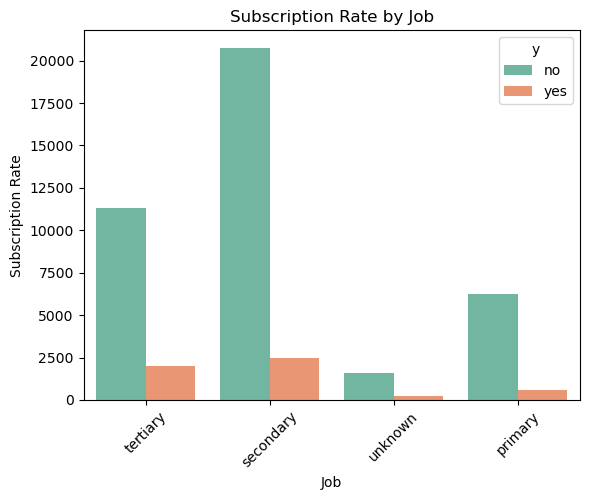

In [28]:
sns.countplot(x='education', hue='y', data=df, palette='Set2')
plt.title('Subscription Rate by Job')
plt.xlabel('Job')
plt.ylabel('Subscription Rate')
plt.xticks(rotation=45)
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



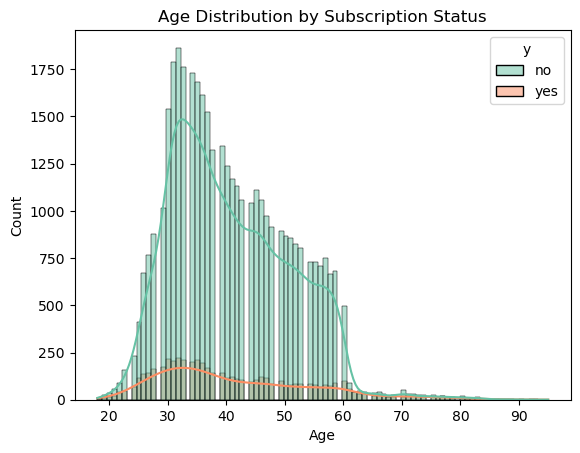

In [29]:
sns.histplot(x='age', hue='y', data=df, kde=True, palette='Set2')
plt.title('Age Distribution by Subscription Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

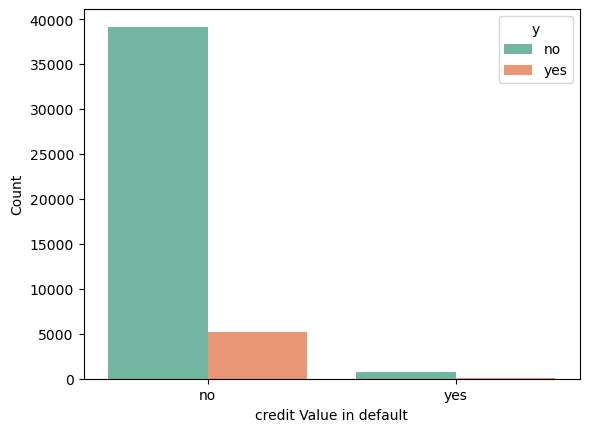

In [30]:
import seaborn as sns
sns.countplot(x='default', hue='y', data=df,palette='Set2')
plt.xlabel('credit Value in default')
plt.ylabel('Count')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



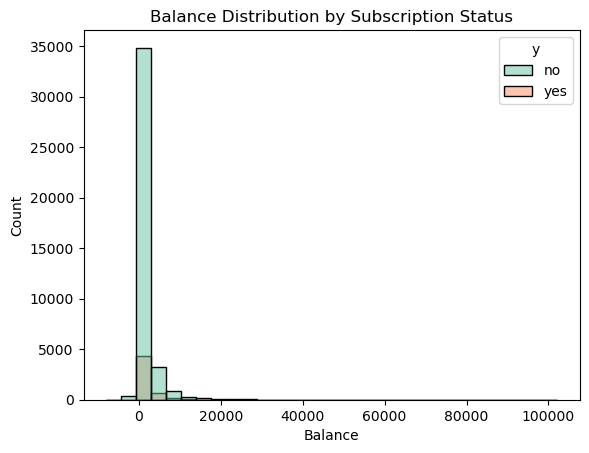

In [31]:
sns.histplot(x='balance', hue='y', data=df, palette='Set2', bins = 30)
plt.title('Balance Distribution by Subscription Status')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.show()

In [32]:
cross_tab = pd.crosstab(df['housing'], df['y'])
print(cross_tab)

y           no   yes
housing             
no       16727  3354
yes      23195  1935


In [33]:
# from scipy.stats import chi2_contingency

# # Create a contingency table
# contingency_table = pd.crosstab(df['feature1'], df['feature2'])

# # Perform Chi-Square test
# chi2, p, dof, expected = chi2_contingency(contingency_table)
# print(f"Chi-Square Statistic: {chi2}")
# print(f"P-value: {p}")

## Calculate Propensity Scores

In [34]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Handle missing values in 'contact'
df['contact'] = df['contact'].fillna('telephone')  # Impute missing values
df['contact'] = df['contact'].replace({'unknown': 'telephone', '': 'telephone', ' ': 'telephone'})  # Replace unexpected values

# Encode categorical variables except 'contact'
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'poutcome']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Ensure 'contact' is still in the dataset
df_encoded['contact'] = df['contact']

# Normalize numerical features
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
scaler = StandardScaler()
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Define treatment and features
treatment = df_encoded['contact'].map({'cellular': 1, 'telephone': 0})  # Treatment variable
X = df_encoded.drop(columns=['contact', 'y'])  # Features

# Verify treatment has no missing values
print(treatment.isnull().sum())

# Train a logistic regression model with increased max_iter and a different solver
propensity_model = LogisticRegression(solver='liblinear', max_iter=1000)
propensity_model.fit(X, treatment)

# Predict propensity scores
propensity_scores = propensity_model.predict_proba(X)[:, 1]
df['propensity_score'] = propensity_scores

0


In [35]:
print(X.describe())  # Check for variation

                age       balance           day      duration      campaign  \
count  4.521100e+04  4.521100e+04  45211.000000  4.521100e+04  4.521100e+04   
mean   2.112250e-16  1.760208e-17     15.806419  6.035001e-17  3.017500e-17   
std    1.000011e+00  1.000011e+00      8.322476  1.000011e+00  1.000011e+00   
min   -2.159994e+00 -3.081149e+00      1.000000 -1.002478e+00 -5.693506e-01   
25%   -7.473845e-01 -4.237719e-01      8.000000 -6.025167e-01 -5.693506e-01   
50%   -1.823406e-01 -3.002800e-01     16.000000 -3.035165e-01 -2.465603e-01   
75%    6.652252e-01  2.158743e-02     21.000000  2.362370e-01  7.622994e-02   
max    5.091402e+00  3.309478e+01     31.000000  1.809470e+01  1.944365e+01   

              pdays      previous  
count  4.521100e+04  4.521100e+04  
mean   2.011667e-17  4.023334e-17  
std    1.000011e+00  1.000011e+00  
min   -4.114531e-01 -2.519404e-01  
25%   -4.114531e-01 -2.519404e-01  
50%   -4.114531e-01 -2.519404e-01  
75%   -4.114531e-01 -2.519404e-01  


## Balance the Dataset Using Propensity Score Matching

In [36]:
from sklearn.neighbors import NearestNeighbors

# Separate treated and control groups
treated = df_encoded[df_encoded['contact'] == 'cellular']
control = df_encoded[df_encoded['contact'] == 'telephone']

# Use Nearest Neighbors to match treated and control units
nbrs = NearestNeighbors(n_neighbors=1).fit(control[['propensity_score']])
distances, indices = nbrs.kneighbors(treated[['propensity_score']])

# Create a matched control group
matched_control = control.iloc[indices.flatten()]

# Combine treated and matched control groups
balanced_df = pd.concat([treated, matched_control])

# Verify the size of the balanced dataset
print("Treated group size:", len(treated))
print("Matched control group size:", len(matched_control))

KeyError: "None of [Index(['propensity_score'], dtype='object')] are in the [columns]"

## Verify Balance

In [ ]:
# Compare means of features in treated and matched control groups
balance_check = balanced_df.groupby('contact')[numerical_cols].mean()
print(balance_check)

                 age      balance    duration  campaign      pdays  previous
contact                                                                     
cellular   40.774889  1528.979641  267.052897  2.625948  58.268781  0.840300
telephone  42.475627  1423.291311  253.250344  2.870628   9.808868  0.178601


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot propensity score distribution
plt.figure(figsize=(10, 6))
sns.histplot(balanced_df[balanced_df['contact'] == 'cellular']['propensity_score'], label='Treated', kde=True, color='blue')
sns.histplot(balanced_df[balanced_df['contact'] == 'telephone']['propensity_score'], label='Control', kde=True, color='orange')
plt.title('Propensity Score Distribution: Treated vs. Control')
plt.xlabel('Propensity Score')
plt.ylabel('Density')
plt.legend()
plt.show()

In [ ]:
# Plot feature means
balance_check.T.plot(kind='bar', figsize=(12, 6))
plt.title('Feature Means: Treated vs. Control')
plt.xlabel('Feature')
plt.ylabel('Mean Value')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# # Calculate ATE (difference in outcomes between treated and control groups)
# ate = balanced_df[balanced_df['contact'] == 'cellular']['y'].mean() - balanced_df[balanced_df['contact'] == 'telephone']['y'].mean()
# print("Average Treatment Effect (ATE):", ate)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load dataset (assuming it's in a CSV file)
# df = pd.read_csv("your_dataset.csv")

# Define treatment and control groups based on the median of balance
median_balance = df['balance'].median()
df['treatment'] = (df['balance'] >= median_balance).astype(int)  # 1 if balance >= median, else 0

# Define features for propensity score estimation (excluding target 'y')
X = df.drop(columns=['y', 'treatment', 'balance'])  # Remove balance since it's the treatment indicator
y = df['treatment']  # Treatment assignment

# Convert categorical variables to dummies
X = pd.get_dummies(X, drop_first=True)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit logistic regression for propensity scores
logreg = LogisticRegression(solver='saga', max_iter=1000)
logreg.fit(X_scaled, y)
df['propensity_score'] = logreg.predict_proba(X_scaled)[:, 1]

# Perform propensity score matching
# Define caliper (small range around each score to find a match)
caliper = 0.05

def match_sample(df):
    treated = df[df['treatment'] == 1]
    control = df[df['treatment'] == 0]
    matched_control = []
    
    for _, row in treated.iterrows():
        potential_matches = control[abs(control['propensity_score'] - row['propensity_score']) <= caliper]
        
        if not potential_matches.empty:
            match = potential_matches.sample(1)  # Randomly select one match
            matched_control.append(match)
            control = control.drop(match.index)  # Remove matched sample to avoid reuse
    
    matched_control = pd.concat(matched_control)
    balanced_df = pd.concat([treated, matched_control])
    return balanced_df

balanced_df = match_sample(df)

# Output final dataset
print(balanced_df[['balance', 'treatment', 'propensity_score']].head())


    balance  treatment  propensity_score
0      2143          1          0.601650
3      1506          1          0.504633
9       593          1          0.446662
20      723          1          0.290427
21      779          1          0.583878


In [ ]:
print(balanced_df['treatment'].value_counts())

treatment
1    22619
0    18674
Name: count, dtype: int64


/var/folders/sm/bbmlhyks29b9zz14bl8h8vwc0000gn/T/ipykernel_3510/2314164844.py:4: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/var/folders/sm/bbmlhyks29b9zz14bl8h8vwc0000gn/T/ipykernel_3510/2314164844.py:5: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.




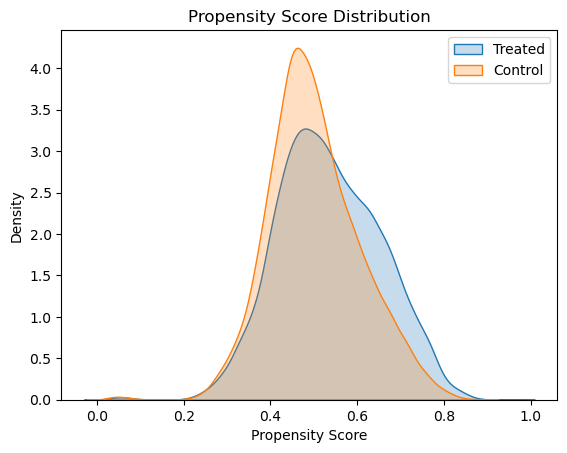

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.kdeplot(balanced_df[balanced_df['treatment'] == 1]['propensity_score'], label="Treated", shade=True)
sns.kdeplot(balanced_df[balanced_df['treatment'] == 0]['propensity_score'], label="Control", shade=True)
plt.xlabel("Propensity Score")
plt.ylabel("Density")
plt.title("Propensity Score Distribution")
plt.legend()
plt.show()


#### Ideally, the distributions should overlap, indicating good matching.

In [ ]:
# print(balanced_df.groupby('treatment').mean())

In [ ]:
balanced_df['y'] = balanced_df['y'].map({'yes': 1, 'no': 0})
treated_mean = balanced_df[balanced_df['treatment'] == 1]['y'].mean()
control_mean = balanced_df[balanced_df['treatment'] == 0]['y'].mean()
treatment_effect = treated_mean - control_mean

print(f"Treatment Effect (ATE): {treatment_effect}")


Treatment Effect (ATE): 0.04381552219647486


The ATE of 0.0438 means that being in the treatment group (i.e., having a balance above the median) increases the probability of y=1 (e.g., a positive outcome) by approximately 4.38 percentage points compared to the control group.

In [ ]:
from scipy.stats import ttest_ind

t_stat, p_value = ttest_ind(
    balanced_df[balanced_df['treatment'] == 1]['y'],
    balanced_df[balanced_df['treatment'] == 0]['y']
)

print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 13.4934453311237, P-value: 2.0925017923767433e-41


If p-value < 0.05, the treatment effect is statistically significant.
If p-value ≥ 0.05, the effect might not be meaningful, and we might need to adjust our approach.


In [ ]:
from sklearn.linear_model import LogisticRegression

logit_model = LogisticRegression(max_iter=500)  # Increase max_iter from default 100
logit_model.fit(df_encoded, df['treatment'])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(max_iter=500)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_encoded[df_encoded.columns] = scaler.fit_transform(df_encoded[df_encoded.columns])